<a href="https://colab.research.google.com/github/NimaiCharan/COVID-19-using-conv2D/blob/master/Conv2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My Drive/Colab Notebooks/COVID-19
!ls

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive/My Drive/Colab Notebooks/COVID-19
covid-19.hdf5  dataset	metadata.csv  separate.ipynb


In [0]:
import pandas as pd
#data pre processing for seprating covid data and other data
user_data=pd.read_csv("metadata.csv")
user_data.head()

,Patientid,offset,sex,age,finding,survival,view,modality,date,location,filename,doi,url,license,clinical notes,other notes,Unnamed: 16
0,2,0.0,M,65.0,COVID-19,Y,PA,X-ray,2020,NaN,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,NaN,NaN,NaN
1,2,3.0,M,65.0,COVID-19,Y,PA,X-ray,2020,NaN,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,NaN,NaN,NaN
2,2,5.0,M,65.0,COVID-19,Y,PA,X-ray,2020,NaN,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,NaN,NaN,NaN
3,2,6.0,M,65.0,COVID-19,Y,PA,X-ray,2020,NaN,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,NaN,NaN,NaN
4,4,0.0,F,52.0,COVID-19,NaN,PA,X-ray,2020,"Changhua Christian Hospital, Changhua City, Ta...",nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN


In [0]:
data_covid=user_data[user_data["finding"]=="COVID-19"]
non_covid=user_data[user_data["finding"]!="COVID-19"]
data_covid["filename"].head(10)


0     auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...
1     auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...
2     auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...
3     auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...
4                                 nejmc2001573_f1a.jpeg
5                                 nejmc2001573_f1b.jpeg
7                                     lancet-case2a.jpg
8                                     lancet-case2b.jpg
20                 1-s2.0-S0140673620303706-fx1_lrg.jpg
21                nCoV-radiol.2020200269.fig1-day7.jpeg
Name: filename, dtype: object

In [0]:

import shutil

#separating covid xray
des="dataset/covid/"
for dat in data_covid["filename"]:
    shutil.copy("images\\"+dat,des)
#separating covid xray
dest="dataset/normal/"
for dat in non_covid["filename"]:
    shutil.copy("images\\"+dat,dest)
    

FileNotFoundError: ignored

In [0]:
#reference
#https://keras.io/applications/
#https://www.pyimagesearch.com/

import os
import matplotlib.pyplot as plt
from imutils import paths
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelBinarizer

from sklearn.metrics import classification_report
import os
from imutils import paths

In [0]:
imagePath=list(paths.list_images("dataset"))
data=[]
labels=[]
for imPath in imagePath:
    label=imPath.split(os.path.sep)[-2]
    img=cv2.imread(imPath)
    img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=cv2.resize(img,(224,224))
    data.append(img)
    labels.append(label)


In [0]:
import pandas as pd
data=np.array(data)/255.0
label=np.array(labels)

lb=LabelBinarizer()
label=lb.fit_transform(label)

label=keras.utils.to_categorical(label)


In [14]:
model=keras.Sequential()
model.add(keras.layers.Conv2D(64, kernel_size=3, activation="relu", input_shape=(224,224,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(4, 4), strides=None, padding='valid', data_format=None))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32,activation="relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(2,activation="softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 222, 222, 64)      1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 55, 55, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 193600)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                6195232   
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 66        
Total params: 6,197,090
Trainable params: 6,197,090
Non-trainable params: 0
____________________________________________

In [0]:
num_epochs=75
train_X,test_X,train_y,test_y=train_test_split(data,label, test_size=0.3,stratify=label,random_state=40)
opt=keras.optimizers.Adam(lr=0.0001, decay=0.0001/num_epochs)
model.compile(optimizer=opt,loss="categorical_crossentropy", metrics=["accuracy"])

In [0]:
filepath="covid-19.hdf5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [17]:
H=model.fit(train_X, train_y, epochs=num_epochs, validation_data=(test_X, test_y), callbacks=callbacks_list)


Epoch 1/75
9/9 [==============================] - ETA: 0s - loss: 0.6592 - accuracy: 0.6168
Epoch 00001: val_accuracy improved from -inf to 0.92373, saving model to covid-19.hdf5
9/9 [==============================] - 3s 286ms/step - loss: 0.6592 - accuracy: 0.6168 - val_loss: 0.5054 - val_accuracy: 0.9237
Epoch 2/75
9/9 [==============================] - ETA: 0s - loss: 0.4992 - accuracy: 0.7117
Epoch 00002: val_accuracy did not improve from 0.92373
9/9 [==============================] - 2s 200ms/step - loss: 0.4992 - accuracy: 0.7117 - val_loss: 0.4360 - val_accuracy: 0.9237
Epoch 3/75
9/9 [==============================] - ETA: 0s - loss: 0.4200 - accuracy: 0.8175
Epoch 00003: val_accuracy did not improve from 0.92373
9/9 [==============================] - 2s 199ms/step - loss: 0.4200 - accuracy: 0.8175 - val_loss: 0.3754 - val_accuracy: 0.8305
Epoch 4/75
9/9 [==============================] - ETA: 0s - loss: 0.3911 - accuracy: 0.8431
Epoch 00004: val_accuracy improved from 0.92373 

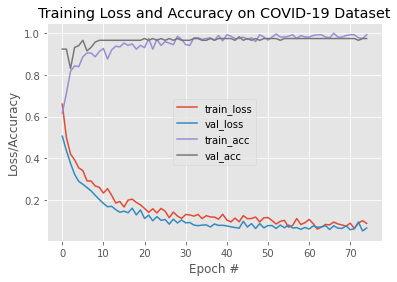

In [18]:
train_loss=H.history['loss']
val_loss=H.history['val_loss']
N=num_epochs #number of epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center")


In [19]:
pred=model.predict(test_X)
pred = np.argmax(pred, axis=1)
print(classification_report(test_y.argmax(axis=1), pred, target_names=lb.classes_))

              precision    recall  f1-score   support

       COVID       0.98      0.96      0.97        48
      NORMAL       0.97      0.99      0.98        70

    accuracy                           0.97       118
   macro avg       0.98      0.97      0.97       118
weighted avg       0.97      0.97      0.97       118



In [0]:
con_mat = tf.math.confusion_matrix(labels=test_y.argmax(axis=1), predictions=pred).numpy()
classes=["covid","normal"]
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
 
con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes, columns = classes)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


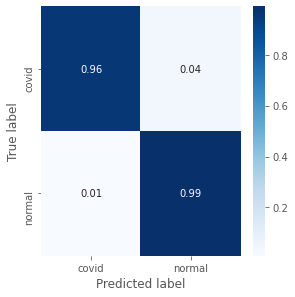

In [21]:
import seaborn as sns
figure = plt.figure(figsize=(4, 4))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()